In [148]:
import pandas as pd
import numpy as np

In [149]:
#Importing the dataset 

Dataset_Columns= ['target','ids','date','flag','user','text']
Dataset_Encoding= "ISO-8859-1"
df= pd.read_csv('Sentiment Analysis- Twitter /dataset.csv', encoding= Dataset_Encoding, names= Dataset_Columns)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [150]:
df['target'].unique().tolist() # So we dont have any neutral values in the dataset, as I got only 2 unique values.

[0, 4]

In [151]:
print('The length of the data is',len(df))

The length of the data is 1600000


In [152]:
df.shape


(1600000, 6)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [154]:
df.isnull().sum() # No missing values are there

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [155]:
!pip3 install wordcloud

In [156]:
# Plotting the visuualizations

import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as WordCloud


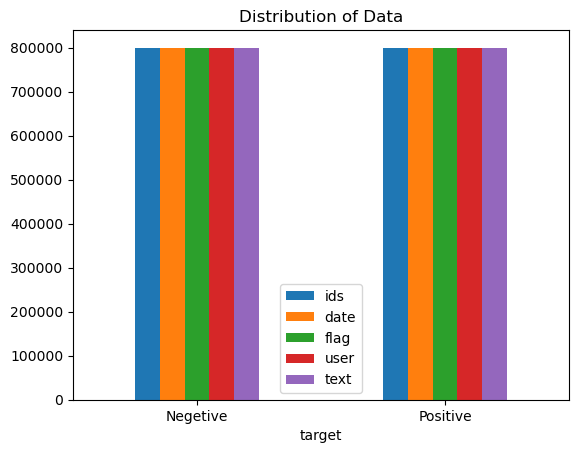

In [157]:
# Distribution of the dataset 
pt= df.groupby('target').count().plot(kind='bar', title='Distribution of Data')
pt.set_xticklabels(['Negetive','Positive'],rotation=0)  
text,sentiment =list(df['text']),list(df['target'])                                    

<Axes: xlabel='target', ylabel='count'>

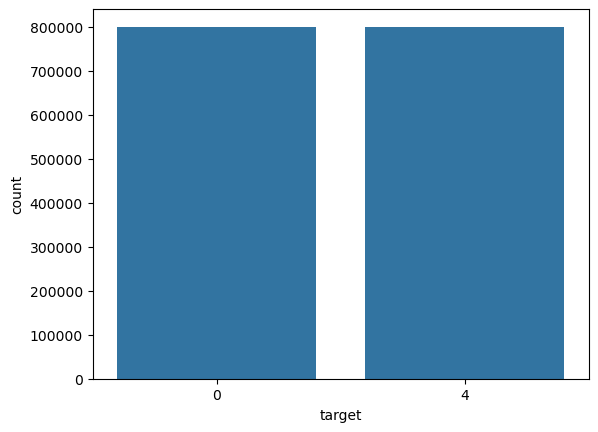

In [158]:
sns.countplot(x='target',data=df) # Target variable is balanced.

In [159]:
# Data Cleaning
data=df[['target','text']]
data['target']= data['target'].replace(4,1)
data['target'].unique()


/var/folders/bs/lqbmkvsx70xbqzzh37fjgbbm0000gn/T/ipykernel_22037/429162839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']= data['target'].replace(4,1)


array([0, 1])

In [160]:
#Seperate positive and negetive tweet 
pos=data[data['target']==1]
neg=data[data['target']==0]



In [161]:
#Taking less values for calculation purpose. will feed real time data after model building 

pos=pos.iloc[:int(30000)]
neg=neg.iloc[:int(30000)]

In [220]:
# making text in lowercase for consistency
dataset= pd.concat([pos,neg])
dataset['text']=dataset['text'].str.lower() # we are converting to lowercase. texts are nothing but tweets. so we have to start cleaning the tweets. to do so we have to make them either in upercase or lowecase that is consistent.
dataset['text'].head()




800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [222]:
twitter_stopwords = [
    # Generic English Stopwords
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are",
    "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both",
    "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't",
    "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't",
    "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here",
    "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm",
    "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more",
    "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or",
    "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she",
    "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's",
    "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they",
    "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under",
    "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't",
    "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom",
    "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've",
    "your", "yours", "yourself", "yourselves"]

In [224]:
#removing stowords

def cleaning_stopwords(text):
    """
    Removes stopwords from the input text.
    """
    return " ".join([word for word in str(text).split() if word not in twitter_stopwords])

dataset['text']=dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()                                   

29995    best weekend ever; caty costigans house, marle...
29996    oh ffs! fucking day. decide *now* needs done, ...
29997    leaving britney-just found jon new kids there!...
29998    @neomic havta' go pee, im scared walk dwn hall...
29999    nooooooooooooooo!!!!!! school today. worst par...
Name: text, dtype: object

In [226]:
# Removing punctuations
# Import necessary libraries
import string

# Define a list of English punctuations
english_punctuations = string.punctuation

# Define the cleaning function for punctuations
def cleaning_punctuations(text):
    """
    Removes punctuations from the input text.
    """
    # Create a translation table for removing punctuations
    translator = str.maketrans('', '', english_punctuations)
    # Translate the text to remove punctuations
    return text.translate(translator)

dataset['text']=dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()   

29995    best weekend ever caty costigans house marley ...
29996    oh ffs fucking day decide now needs done after...
29997    leaving britneyjust found jon new kids therei ...
29998    neomic havta go pee im scared walk dwn hall pl...
29999    nooooooooooooooo school today worst part wont ...
Name: text, dtype: object

In [228]:
# Removing repeating characters

# Import necessary library
import re

# Define a function to remove repeating characters
def cleaning_repeating_char(text):
    """
    Removes repeating characters from the input text.
    For example: 'Helloooo' -> 'Helo'
    """
    return re.sub(r'(.)\1+', r'\1', text)

dataset['text']=dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()   

29995    best wekend ever caty costigans house marley f...
29996    oh fs fucking day decide now neds done after f...
29997    leaving britneyjust found jon new kids therei ...
29998    neomic havta go pe im scared walk dwn hal plea...
29999    no schol today worst part wont able twet troug...
Name: text, dtype: object

In [230]:
# Removing URLS'S

# Cleaning URLs
def cleaning_URLs(data):
    return re.sub(r'(www\.[^\s]+)|(https?://[^\s]+)', ' ', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()


29995    best wekend ever caty costigans house marley f...
29996    oh fs fucking day decide now neds done after f...
29997    leaving britneyjust found jon new kids therei ...
29998    neomic havta go pe im scared walk dwn hal plea...
29999    no schol today worst part wont able twet troug...
Name: text, dtype: object

In [232]:
#cleaning numbers
# Cleaning numbers -> as it doesn't provide sentiment to us
def cleaning_numbers(data):
    return re.sub(r'[0-9]+', '', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()


29995    best wekend ever caty costigans house marley f...
29996    oh fs fucking day decide now neds done after f...
29997    leaving britneyjust found jon new kids therei ...
29998    neomic havta go pe im scared walk dwn hal plea...
29999    no schol today worst part wont able twet troug...
Name: text, dtype: object

In [234]:
def tokenization(text):
    text = re.split('\W+', text)  # Splits the text into tokens based on non-word characters
    return text

# Apply the tokenization function to the 'text' column
dataset['text'] = dataset['text'].apply(lambda x: tokenization(x.lower()))  # Ensure lowercase during tokenization
dataset['text'].tail()  # View the last few entries of the transformed column



<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
/var/folders/bs/lqbmkvsx70xbqzzh37fjgbbm0000gn/T/ipykernel_22037/4114360234.py:2: SyntaxWarning: invalid escape sequence '\W'
  text = re.split('\W+', text)  # Splits the text into tokens based on non-word characters


29995    [best, wekend, ever, caty, costigans, house, m...
29996    [oh, fs, fucking, day, decide, now, neds, done...
29997    [leaving, britneyjust, found, jon, new, kids, ...
29998    [neomic, havta, go, pe, im, scared, walk, dwn,...
29999    [no, schol, today, worst, part, wont, able, tw...
Name: text, dtype: object

In [236]:
# Stemming -> reduce words to base words for sentiment conversion (Similar kind of words)
import nltk
st = nltk.PorterStemmer()  # Initialize the Porter Stemmer

def stemming_on_text(data):
    text = [st.stem(word) for word in data]  # Apply stemming on each word in the input data
    return data

# Apply the stemming function to the 'text' column
dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()  # Display the first few rows of the processed 'text' column


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meting, one, besties, tonight, cant, wait...
800002    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800003    [sick, can, realy, cheap, hurts, much, eat, re...
800004                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [238]:
#Data Visulization
#Seperating feature and target 
X= data.text
Y= data.target

In [240]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

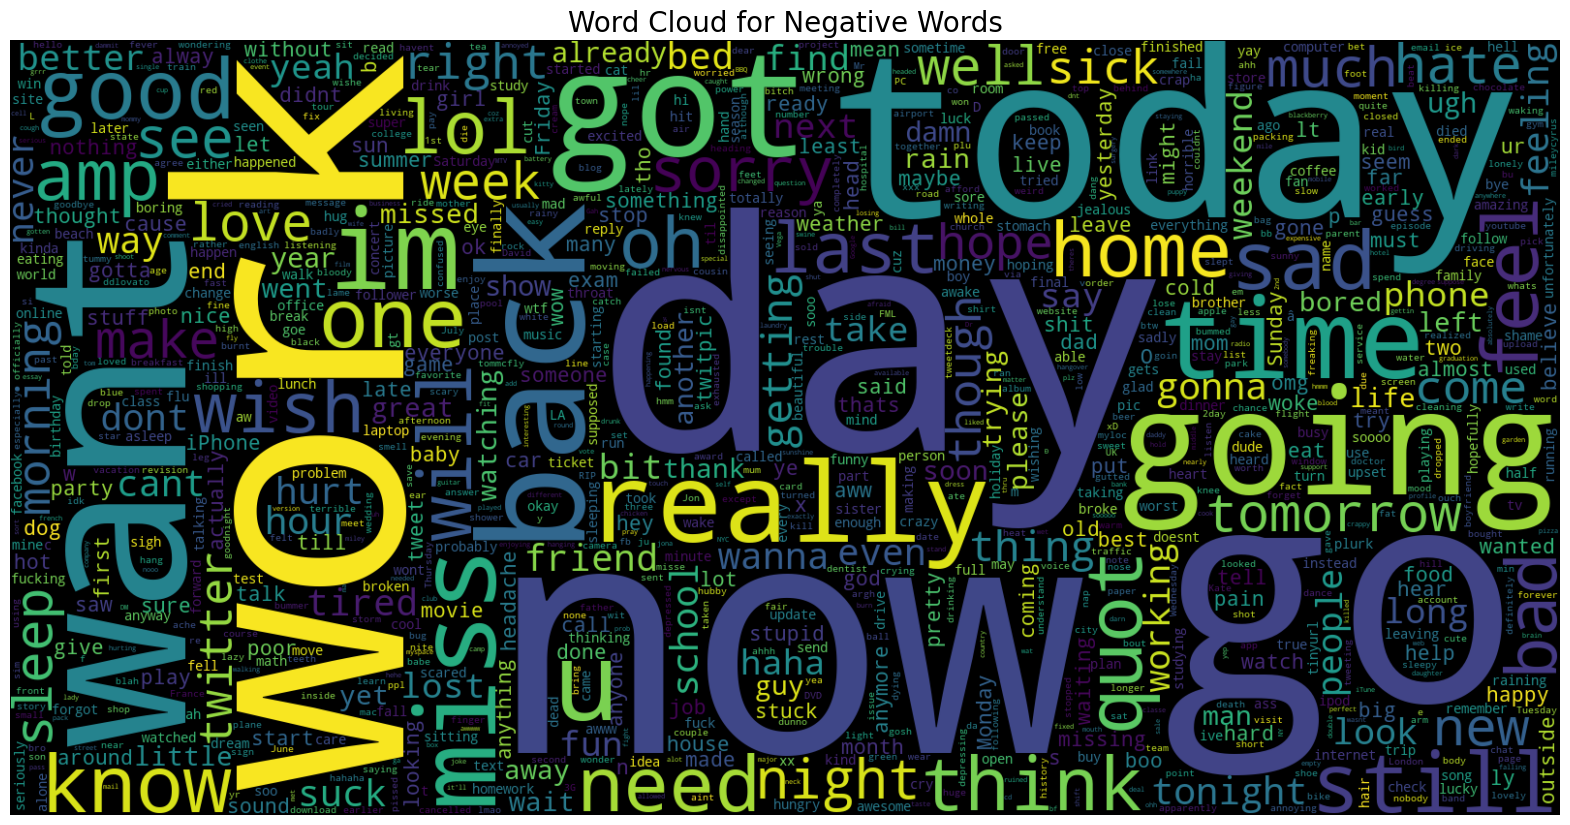

In [242]:
# Word Cloud for Negative Words
data_neg = data['text'][:800000]  # Adjusting range for negative data
plt.figure(figsize=(20, 20))  # Set figure size
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))  # Generate word cloud
plt.imshow(wc, interpolation='bilinear')  # Display word cloud
plt.axis("off")  # Turn off axis
plt.title("Word Cloud for Negative Words", fontsize=20)
plt.show()


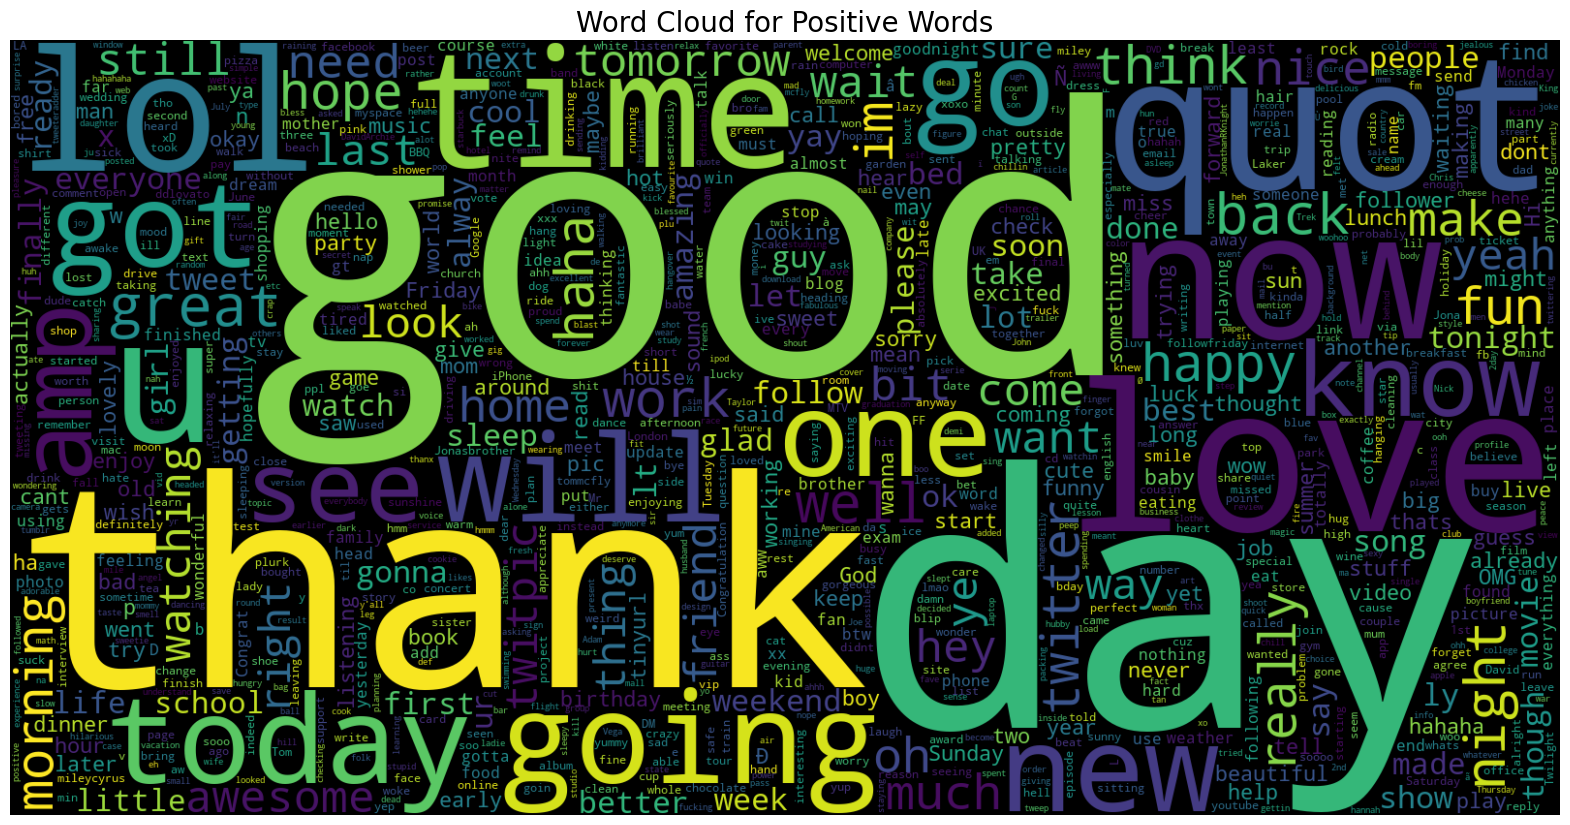

In [244]:
# Word Cloud for Positive Words
data_pos = data['text'][800000:]  # Adjusting range for positive data
plt.figure(figsize=(20, 20))  # Set figure size
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))  # Generate word cloud
plt.imshow(wc, interpolation='bilinear')  # Display word cloud
plt.axis("off")  # Turn off axis
plt.title("Word Cloud for Positive Words", fontsize=20)
plt.show()

In [252]:
# Building training and testing data
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Separating the data: 95% for training and 5% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)




In [256]:
# Training the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)

# Print the number of features created by the vectorizer
print('Number of feature words: ', len(vectoriser.get_feature_names_out()))

Number of feature words:  500000


In [258]:
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)
                          

In [268]:
#Model evaluation 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Model Evaluation Function
def model_Evaluate(model):
    """
    Evaluate the performance of the given model on the test dataset.
    Includes classification report and confusion matrix visualization.
    """
    # Predict values for the test dataset
    Y_pred = model.predict(X_test)
    
    # Print evaluation metrics for the dataset
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    
    # Compute and plot the confusion matrix
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted Values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual Values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

# Example Usage:
# model_Evaluate(your_trained_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39999
           1       0.80      0.81      0.80     40001

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



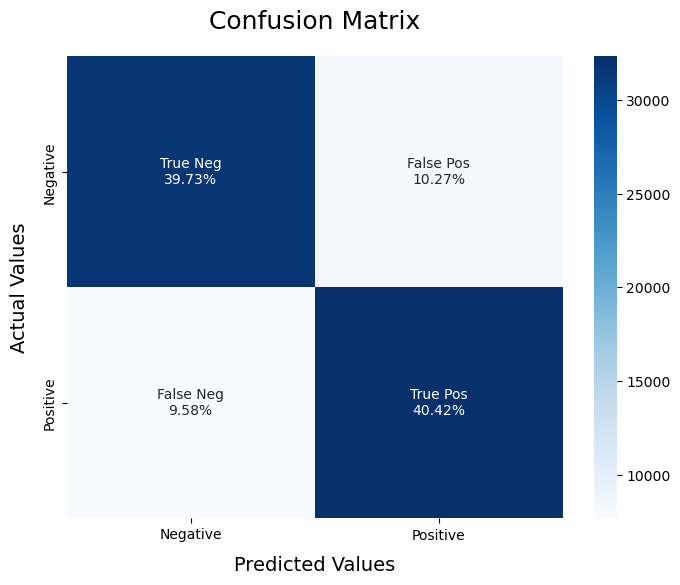

In [270]:
# MODEL - 1: Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

# Initialize Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()

# Fit the model to the training data
BNBmodel.fit(X_train, Y_train)

# Evaluate the model using the evaluation function
model_Evaluate(BNBmodel)

# Predict on the test set
Y_pred1 = BNBmodel.predict(X_test)


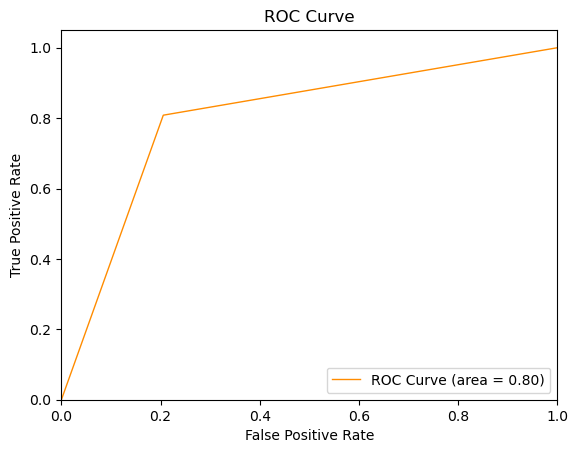

In [272]:
# MODEL - 1 : ROC - AUC curve for binary classifier
from sklearn.metrics import roc_curve, auc

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39999
           1       0.81      0.82      0.82     40001

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



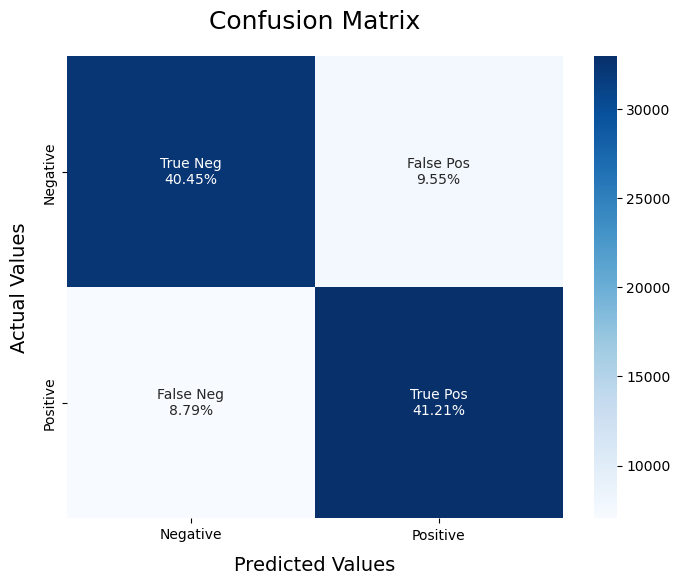

In [274]:
# Model - 2: SVM (Support Vector Machine)
from sklearn.svm import LinearSVC

# Initialize the SVM model
SVCmodel = LinearSVC()

# Train the SVM model
SVCmodel.fit(X_train, Y_train)

# Evaluate the model
model_Evaluate(SVCmodel)

# Predict on the test set
y_pred2 = SVCmodel.predict(X_test)


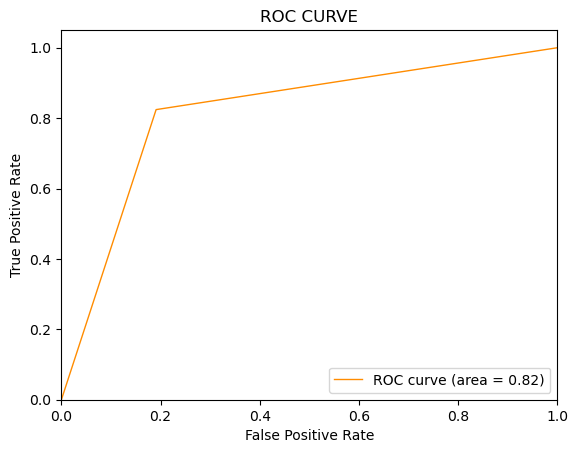

In [278]:
# MODEL - 2: ROC - AUC Curve for SVM
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for SVM model
fpr, tpr, thresholds = roc_curve(Y_test, y_pred2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     39999
           1       0.82      0.83      0.83     40001

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



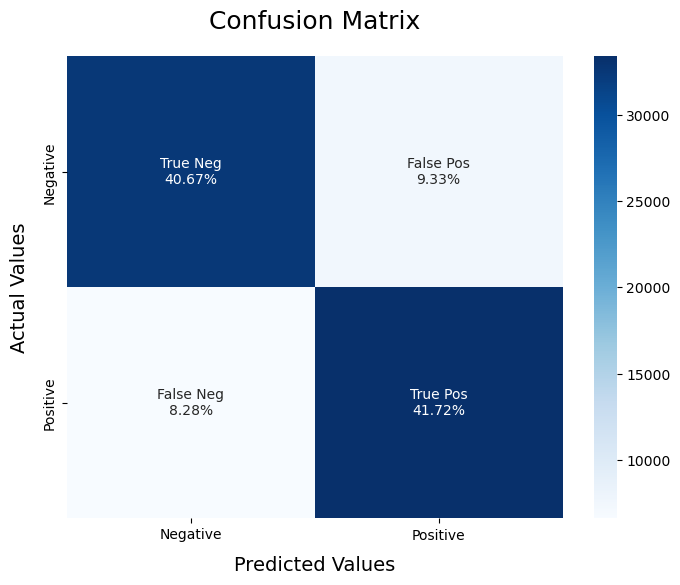

In [280]:
# Model 3 - Logistic Regression
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     39999
           1       0.82      0.83      0.83     40001

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



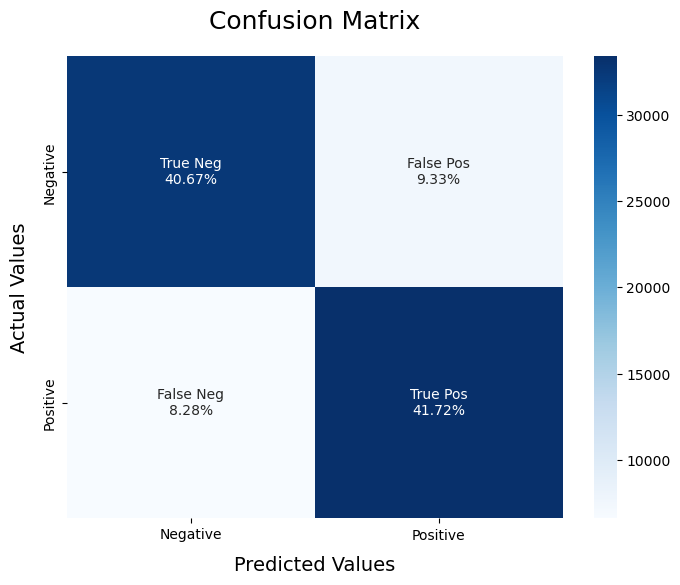

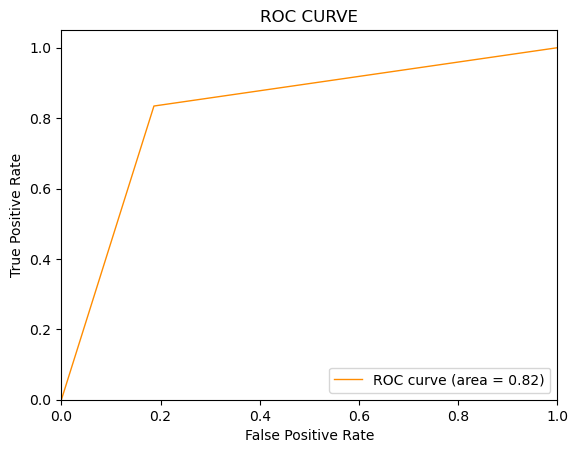

In [284]:
# Model 3 - Logistic Regression
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

# ROC - AUC Curve for Model 3
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred3)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()
